In [8]:
# (1) 데이터 가져오기
# - 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져옵니다.
import pandas as pd

train = pd.read_csv('~/Desktop/study_record_of_aiffel/EXPLORATION_RS5/data/bike-sharing-demand/train.csv')
# dataframe 크기 확인
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
# - to_datetime 활용
# - pandas datetime extract year month day 키워드로 검색해 보기
# Stackoverflow 참고: https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
train["datetime"] = pd.to_datetime(train["datetime"])

AttributeError: 'Series' object has no attribute 'year'

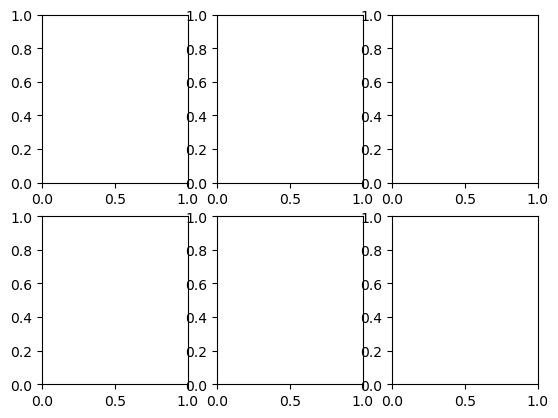

In [21]:
# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
# - sns.countplot 활용해서 시각화하기
# - subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
# 참고링크: https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side
import seaborn as sns
import matplotlib.pyplot as plt
# 한 줄에 3개씩 배치
fig, ax = plt.subplots(2, 3)
sns.countplot(train['datetime'].year, ax=ax[0][0])
sns.countplot(train['datetime'].month, ax=ax[0][1])
sns.countplot(train['datetime'].day, ax=ax[0][2])
# sns.countplot(train['hour'], ax=ax[1][0])
# sns.countplot(train['minute'], ax=ax[1][1])
# sns.countplot(train['second'], ax=ax[1][2])
# 그래프 보기
fig.show()



In [133]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리
# - X (feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다. 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 
# - 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다
# - ex) count를 예측하는데 casual, registered 컬럼이 필요할까요?
# - count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기
X = train[['temp', 'humidity', 'windspeed']].values
y = train['count'].values

## train / test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40)

print("TRAIN 데이터")
print(f"{X_train.shape}, {y_train.shape}")
print("TEST 데이터")
print(f"{X_test.shape}, {y_test.shape}")

TRAIN 데이터
(9253, 3), (9253,)
TEST 데이터
(1633, 3), (1633,)


In [134]:
# (5) LinearRegression 모델 학습
# - sklearn의 LinearRegression 모델 불러오기 및 학습하기
from sklearn.linear_model import LinearRegression

# 모델 불러오기
model = LinearRegression()

# 학습하기
model.fit(X_train, y_train)

LinearRegression()

In [135]:
# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
# - 학습된 모델에 X_test를 입력해서 예측값 출력하기
predictions = model.predict(X_test)
predictions

array([185.0976837 , 278.65116113, 208.42520353, ..., 322.42705333,
       210.52971044, 301.60343113])

In [136]:
# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
# - 모델이 예측한 값과 정답 target간의 손실함수 값 계산하기
# - mse 값과 함께 rmse 값도 계산하기
## MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

24261.400345165188

In [143]:
# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
# - 모델이 예측한 값과 정답 target간의 손실함수 값 계산하기
# - mse 값과 함께 rmse 값도 계산하기
## RMSE
## 참고: https://growingsaja.tistory.com/233
rmse = mean_squared_error(y_test, predictions, squared=False)
rmse

155.76071502521162

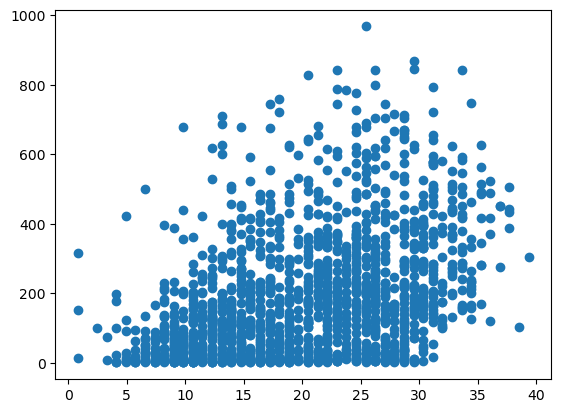

In [144]:
# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
# - x축에 X 데이터 중 temp 데이터를, y 축에는 count 데이터를 넣어서 시각화하기
### X = train[['temp', 'humidity', 'windspeed']].values
plt.scatter(X_test[:, 0], y_test, label=True)


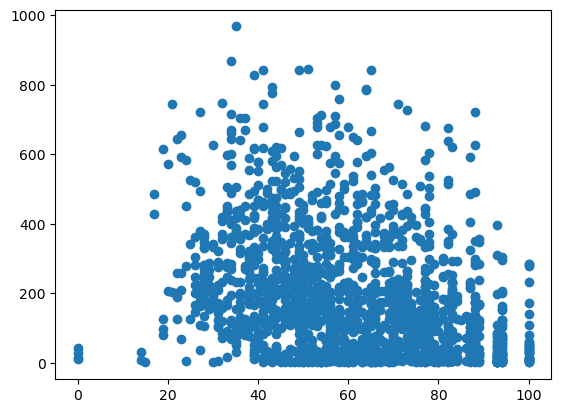

In [145]:
# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
# - x축에 X 데이터 중 humidity 데이터를, y 축에는 count 데이터를 넣어서 시각화하기
### X = train[['temp', 'humidity', 'windspeed']].values
plt.scatter(X_test[:, 1], y_test, label=True)